<a href="https://colab.research.google.com/github/NotYeshwanthReddy/CrackSegmentation/blob/main/Crack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !cp -r "/content/drive/MyDrive/Projects/Pakkanodi Assignments/Crack Detection/crack_dataset/crack_detection_dataset/crack_detection_dataset_2/" "./crack_detection_dataset/crack_detection_dataset_1/"

In [ ]:
# !cp -r "/content/drive/MyDrive/Projects/Pakkanodi Assignments/Crack Detection/crack_dataset/crack_detection_dataset/crack_detection_dataset_3/" "./crack_detection_dataset/crack_detection_dataset_3/"
# !zip -r "./crack_detection_dataset3.zip" "./crack_detection_dataset/crack_detection_dataset_3/"
# !cp "./crack_detection_dataset3.zip" "/content/drive/MyDrive/Projects/Pakkanodi Assignments/Crack Detection/crack_detection_dataset3.zip"

In [ ]:
# ! zip -r "./crack_detection_dataset.zip" "./crack_detection_dataset/"

In [ ]:
# ! unzip "./crack_detection_dataset.zip"

In [ ]:
# !cp "/content/drive/MyDrive/Projects/Pakkanodi Assignments/Crack Detection/crack_detection_dataset.zip" "./crack_detection_dataset.zip"
# !cp "/content/drive/MyDrive/Projects/Pakkanodi Assignments/Crack Detection/Crack_Segmentation_Dataset.zip" "./Crack_Segmentation_Dataset.zip"

In [ ]:
import gdown

url = "https://drive.google.com/uc?id=16215pNrs2hYCsMqNjhVofv0EKyvh56kP&export=download"
out_path = "crack_detection_dataset.zip"
gdown.download(url, out_path, quiet=False)

! unzip "./crack_detection_dataset.zip"

In [ ]:
import gdown

url = "https://drive.google.com/uc?id=16215pNrs2hYCsMqNjhVofv0EKyvh56kP&export=download"
out_path = "Crack_Segmentation_Dataset.zip"
gdown.download(url, out_path, quiet=False)

! unzip "Crack_Segmentation_Dataset.zip"

# Crack Detection

We have taken a dataset of both cracked and non-cracked walls. The dataset contains 960 cracked walls and 1190 non-cracked walls.

We process these images and save them in a proper folder structure for the keras ImageDataGenerator module.
```
├── train
│   ├── crack
│   ├── no_crack
├── test
│   ├── crack
│   ├── no_crack
├── validation
│   ├── crack
│   ├── no_crack
└── vizualization
```

Once the processing is done we use keras ImageDataGenerator module to convert these images into tensor object. These objects support multi-dimensional operations and are easy to compute by the Machine Learning model.


Modeling: We use LeNet model structure to train on this data. For training, we are using 1600 images equally divided into crack and no_crack classes.


The model has gained an accuracy of 91% in the first 10 epochs. The same is found on validation data as well, which shows the model has been trained well.


For segmentation, we are using a hilight function, This function divides the image into 144 segments, 12-horizontal and 12-vertical. These segments are sent to the classifier to get the predictions.

All the predictions are accumulated and a highliting filter is applied to represent the class of each segment.
The green hilight shows no_crack and the red hilight shows the detection of crack in that segment.


Some sample images with segmented output are shown at the end of this notebook.


Here we are using deeplearning to classify the image and manually segmenting the image to get the output.

However, a better technique of end-to-end deep learning technique can be used to get better segmented output. Our future work will focus on implementing end-to-end deeplearning technique for segmentation.

# Imports and Reading data

In [ ]:
#importing os, shutil and glob for copying concrete images from raw folder to the new structure which is
#required for ImageDataGenerator.flow_from_directory
import os
import shutil
import glob

###Main directory where concrete images dataset is present##########
data_dir = 'crack_detection_dataset/crack_detection_dataset_1/'

#storing locations of crack images in crack_images list
crack_images = os.listdir(data_dir+'crack/')
print('total images with cracks : ', len(crack_images))
#storing locations of uncrack images in uncrack_images list
uncrack_images = os.listdir(data_dir+'no_crack/')
print('total images without cracks : ', len(uncrack_images))

total images with cracks :  960
total images without cracks :  1190


# Visualization

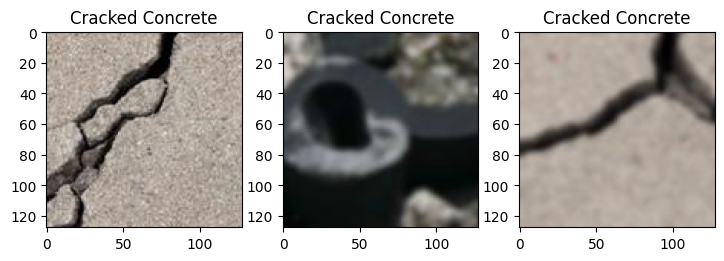

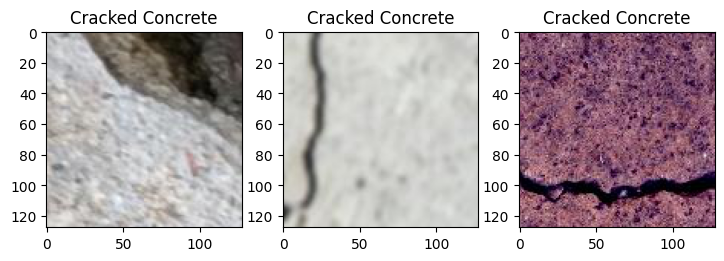

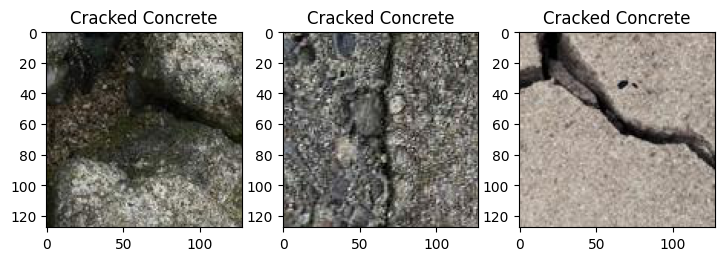

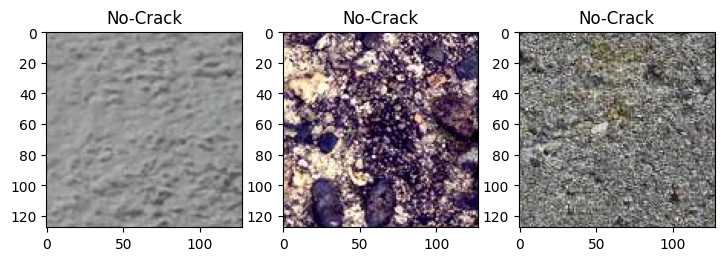

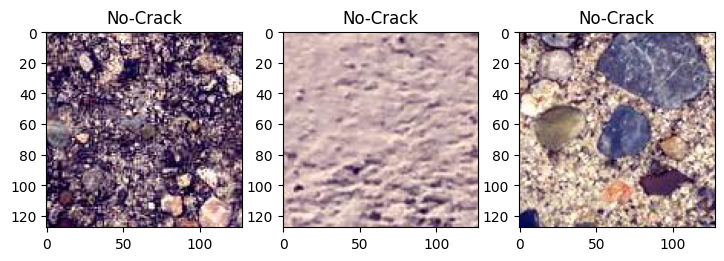

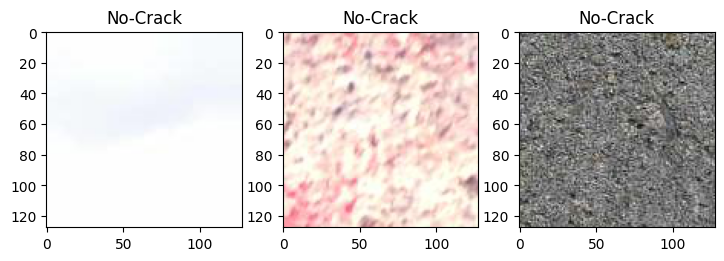

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline

# Displaying images with and without crack
random_crack_images_indices = np.random.randint(0, len(crack_images), 9)
random_crack_images = [crack_images[index] for index in random_crack_images_indices]

random_uncrack_images_indices = np.random.randint(0, len(uncrack_images), 9)
random_uncrack_images = [uncrack_images[index] for index in random_uncrack_images_indices]

for k, images in enumerate([random_crack_images, random_uncrack_images]):
    imindex = 0
    title = 'Cracked Concrete' if k == 0 else 'No-Crack'
    for i in range(3):
        fig = plt.figure(figsize=(30, 30))
        for j in range(3):
            axisarr = fig.add_subplot(10, 10, j+1)
            image_path = os.path.join(data_dir, 'crack' if k == 0 else 'no_crack', images[imindex])
            image = mpimg.imread(image_path)
            axisarr.imshow(image)
            axisarr.set_title(title)
            imindex += 1
    plt.show()


# Data Processing

## Creating file tree

In [ ]:
!rm -r "./concrete_crack_data"

dirs = ["concrete_crack_data", "concrete_crack_data/train", "concrete_crack_data/test", "concrete_crack_data/validation", "concrete_crack_data/visualization", "concrete_crack_data/visualization/real_images", "concrete_crack_data/train/crack", "concrete_crack_data/train/uncrack", "concrete_crack_data/test/crack", "concrete_crack_data/test/uncrack", "concrete_crack_data/validation/crack", "concrete_crack_data/validation/uncrack"]

for dir in dirs:
  try:
    os.mkdir(dir)
  except:
    pass

crack_images_path = [os.path.join(data_dir, 'crack/', image) for image in crack_images]
uncrack_images_path = [os.path.join(data_dir, 'no_crack/', image) for image in uncrack_images]

rm: cannot remove './concrete_crack_data': No such file or directory


In [ ]:
#lets shuffle these images
import random
random.shuffle(crack_images_path)
random.shuffle(uncrack_images_path)

first_900_crack_images_path = crack_images_path[0:900]
first_900_uncrack_images_path = uncrack_images_path[0:900]

print(len(first_900_crack_images_path), len(first_900_uncrack_images_path))

train_crack_900 = first_900_crack_images_path[0:800]
test_crack_900 = first_900_crack_images_path[800:840]
validation_crack_900 = first_900_crack_images_path[840:895]
visualization_crack_900 = first_900_crack_images_path[895:900]

train_uncrack_900 = first_900_uncrack_images_path[0:800]
test_uncrack_900 = first_900_uncrack_images_path[800:840]
validation_uncrack_900 = first_900_uncrack_images_path[840:895]
visualization_uncrack_900 = first_900_uncrack_images_path[895:900]

900 900


In [ ]:
base_dir = 'concrete_crack_data/'

for image_list, dest_dir in [(train_crack_900, 'train/crack/'),
                             (test_crack_900, 'test/crack/'),
                             (validation_crack_900, 'validation/crack/'),
                             (visualization_crack_900, 'visualization/real_images/'),
                             (train_uncrack_900, 'train/uncrack/'),
                             (test_uncrack_900, 'test/uncrack/'),
                             (validation_uncrack_900, 'validation/uncrack/'),
                             (visualization_uncrack_900, 'visualization/real_images/')]:
    for image in image_list:
        dest = os.path.join(base_dir, dest_dir)
        if os.path.isfile(image):
            shutil.copy(image, dest)
        else:
            print("skipping:", image)


skipping: crack_detection_dataset/crack_detection_dataset_1/crack/test
skipping: crack_detection_dataset/crack_detection_dataset_1/no_crack/test


## Creating keras ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

data_gen_args = dict(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
data_dir = 'concrete_crack_data/'
img_size = (227, 227)

train_generator_1800, test_generator_1800, validation_generator_1800, visualization_generator_1800 = \
            [ImageDataGenerator(**data_gen_args).flow_from_directory(directory=f'{data_dir}/{subset}',
                                                                      target_size=img_size,
                                                                      batch_size=batch_size,
                                                                      class_mode='binary')
            for subset in ['train', 'test', 'validation', 'visualization']]


Found 1598 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


# Modeling

In [ ]:
#import keras and different type of layers for for defining CNN models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.metrics import Precision, Recall

In [ ]:
lenetModel = Sequential()
lenetModel.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(227, 227, 3)))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel.add(Dense(120))
lenetModel.add(Activation('relu'))
lenetModel.add(Dense(units=84))
lenetModel.add(Activation('relu'))

lenetModel.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel.add(Activation('sigmoid'))

lenetModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 6)       456       
                                                                 
 activation (Activation)     (None, 223, 223, 6)       0         
                                                                 
 average_pooling2d (AverageP  (None, 111, 111, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 16)      2416      
                                                                 
 activation_1 (Activation)   (None, 107, 107, 16)      0         
                                                                 
 average_pooling2d_1 (Averag  (None, 53, 53, 16)       0         
 ePooling2D)                                            

In [ ]:
if os.path.isfile("lenetModelWeights_8K.h5"):
  lenetModel.load_weights('lenetModelWeights_8K.h5')
  print("Weights loaded. No need to train the model.")
else:
  print("File not found. No Weights loaded. Training is required.")

File not found. No Weights loaded. Training is required.


In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [ ]:
import time
start_time = time.time()
lenetModel.fit(
        train_generator_1800,
        epochs=10,
        validation_data = validation_generator_1800,
        callbacks=[es]
)
finish_time = time.time()
time_taken = finish_time-start_time
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken // 60, time_taken % 60))

Epoch 1/10
50/50 [==============================] - 35s 425ms/step - loss: 0.7647 - accuracy: 0.5989 - precision: 0.5752 - recall: 0.7559 - val_loss: 0.6027 - val_accuracy: 0.6273 - val_precision: 0.5854 - val_recall: 0.8727
Epoch 2/10
50/50 [==============================] - 19s 377ms/step - loss: 0.4993 - accuracy: 0.7879 - precision: 0.7401 - recall: 0.8874 - val_loss: 0.4331 - val_accuracy: 0.7909 - val_precision: 0.7162 - val_recall: 0.9636
Epoch 3/10
50/50 [==============================] - 20s 407ms/step - loss: 0.4161 - accuracy: 0.8323 - precision: 0.7940 - recall: 0.8974 - val_loss: 0.4552 - val_accuracy: 0.7364 - val_precision: 0.9062 - val_recall: 0.5273
Epoch 4/10
50/50 [==============================] - 19s 378ms/step - loss: 0.3932 - accuracy: 0.8404 - precision: 0.8056 - recall: 0.8974 - val_loss: 0.4094 - val_accuracy: 0.8455 - val_precision: 0.8167 - val_recall: 0.8909
Epoch 5/10
50/50 [==============================] - 22s 432ms/step - loss: 0.3368 - accuracy: 0.8680

In [ ]:
test_loss_1800, accuracy_1800, precision_1800, recall_1800 = lenetModel.evaluate_generator(test_generator_1800)

print(' accuracy_1800 : ', accuracy_1800, '\n', 'precision_1800 : ', precision_1800, '\n', 'recall_1800 : ', recall_1800)

<ipython-input-15-d67bd77624c2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss_1800, accuracy_1800, precision_1800, recall_1800 = lenetModel.evaluate_generator(test_generator_1800)


 accuracy_1800 :  0.9375 
 precision_1800 :  0.9069767594337463 
 recall_1800 :  0.9750000238418579


In [ ]:
imgarr_1800 = visualization_generator_1800[0][0]
imgarr_1800.shape

(10, 227, 227, 3)

1/1 [==============================] - 0s 225ms/step


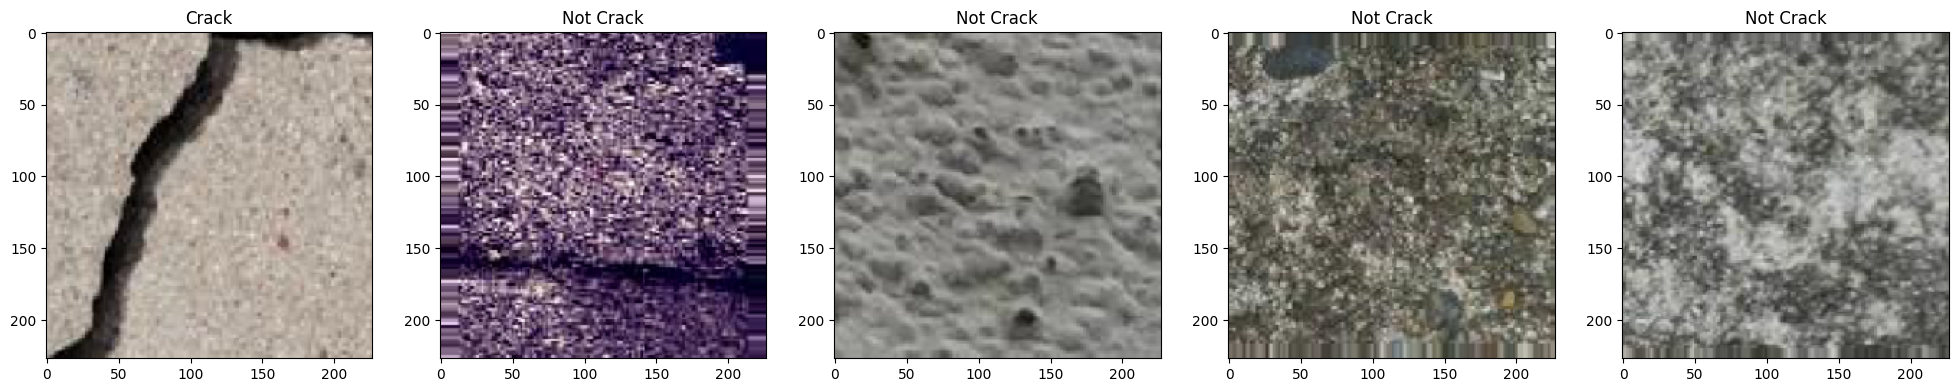

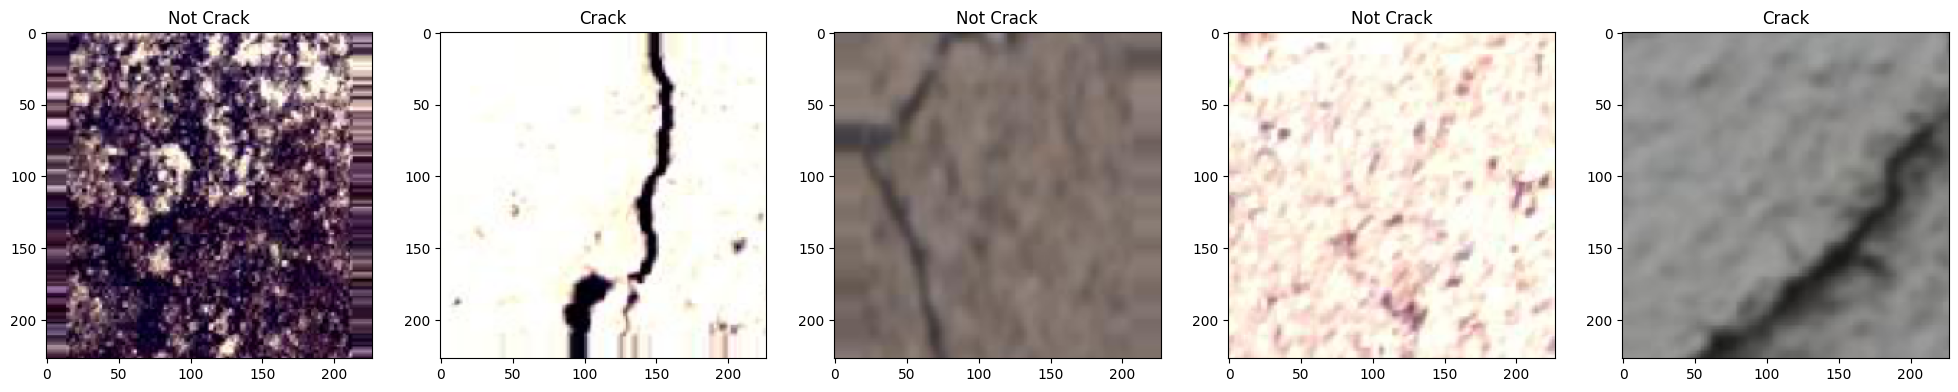

In [ ]:
import numpy as np

predictions = lenetModel.predict(imgarr_1800)
pred_class_arr = np.array(predictions).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_1800[counter])
        if(pred_class_arr[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

100%|██████████| 12/12 [00:08<00:00,  1.43it/s]


Text(0.5, 1.0, 'Crack Highlighted Image')

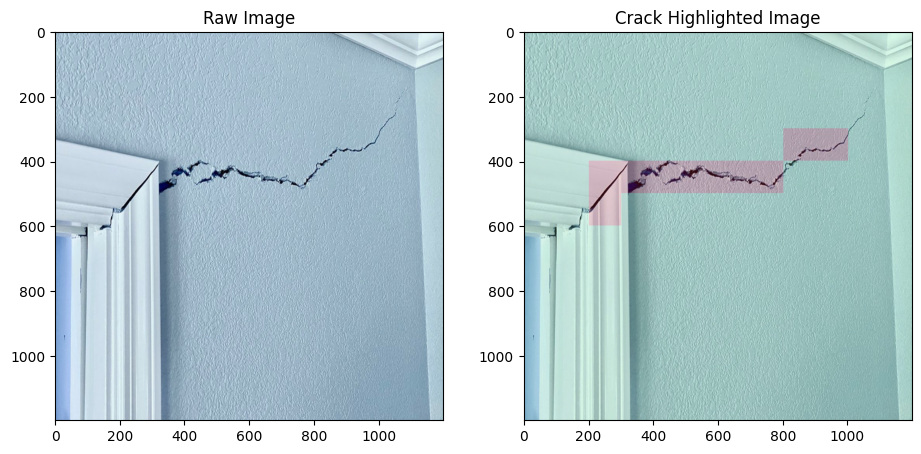

In [ ]:
from tqdm import tqdm

def highlight_cracks(im, model):
    output_image = np.zeros_like(im)
    a = 0
    for i in tqdm(range(12)):
        k = 0
        for j in range(12):
            p = im[a:a+100, k:k+100]
            resizeIm = cv2.resize(p, (227, 227))
            im_arr = np.zeros((1, 227, 227, 3))
            im_arr[0] = resizeIm
            pred = model.predict(im_arr, verbose=0)
            prediction = np.array(pred).round()
            if(prediction == 0):
                color = (255, 26, 26)
            else:
                color = (153, 255, 153)
            b = np.zeros_like(p, dtype=np.uint8)
            b[:] = color
            add_img = cv2.addWeighted(p, 0.83, b, 0.17, 0)
            output_image[a:a+100, k:k+100] = add_img
            k += 100
        a += 100
    return output_image

random_image_path = "/content/concrete_crack_data/visualization/real_images/internet-crack-image.jpg"

im = cv2.imread(random_image_path)
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image = highlight_cracks(im, lenetModel)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image)
axisarr.set_title('Crack Highlighted Image')

100%|██████████| 12/12 [00:08<00:00,  1.45it/s]


Text(0.5, 1.0, 'Crack Highlighted Image')

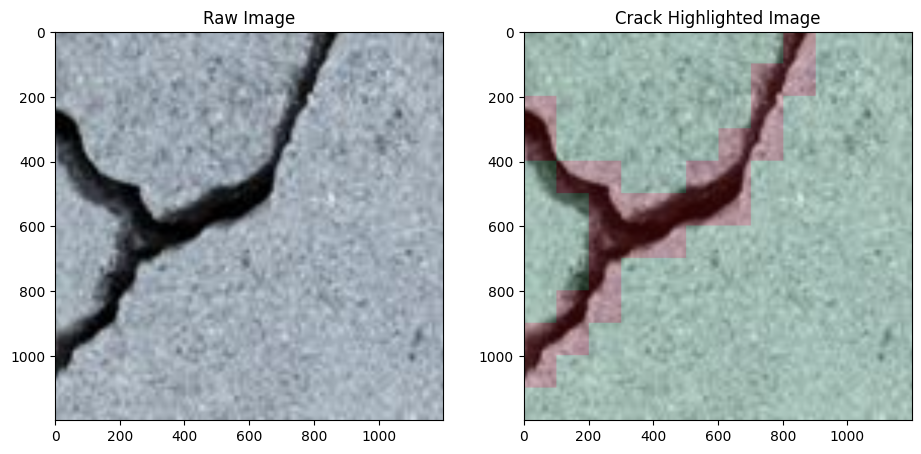

In [ ]:
random_image_path = "/content/concrete_crack_data/visualization/real_images/imrot263g (2).jpg"

im = cv2.imread(random_image_path)
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image = highlight_cracks(im, lenetModel)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image)
axisarr.set_title('Crack Highlighted Image')

100%|██████████| 12/12 [00:08<00:00,  1.39it/s]


Text(0.5, 1.0, 'Crack Highlighted Image')

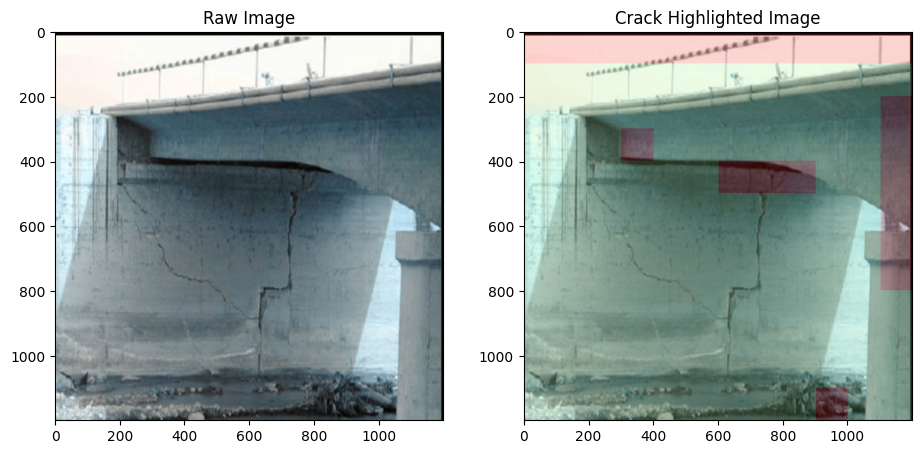

In [ ]:
random_image_path = "/content/concrete_crack_data/visualization/real_images/bridge-crack3.png"

im = cv2.imread(random_image_path)
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image = highlight_cracks(im, lenetModel)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image)
axisarr.set_title('Crack Highlighted Image')

In [ ]:
lenetModel.save_weights('lenetModelWeights_8K.h5')